In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

a,bは0.5～2m、dは0.6mくらい、rは15mmくらい

In [4]:
# const [mm]
r = 15.725
d = 500.0
a = 2038.37
b = 2155.12

In [5]:
def terminal_trajectory(th, r, l, d):
    """
    th: angle [rad]
    r: pulley raidus [m]
    l: wire length [m]
    d: x-axis offset [m]
    """
    x = (l - r * th) * np.cos(th) + r * np.sin(th) - d
    y = (l - r * th) * np.sin(th) - r * np.cos(th)
    return np.array([x, y])

In [6]:
df = pd.DataFrame()
# theta [rad]
dt = np.pi / (180)
df['theta'] = np.arange(0, 2*np.pi + dt, dt)
# x1, y1
f1 = terminal_trajectory(df.theta, r, a, 0)
df['x1'] = f1[0]
df['y1'] = f1[1]
# x2, y2
f2 = terminal_trajectory(df.theta, r, b, d)
df['x2'] = f2[0]
df['y2'] = f2[1]

<IPython.core.display.Javascript object>


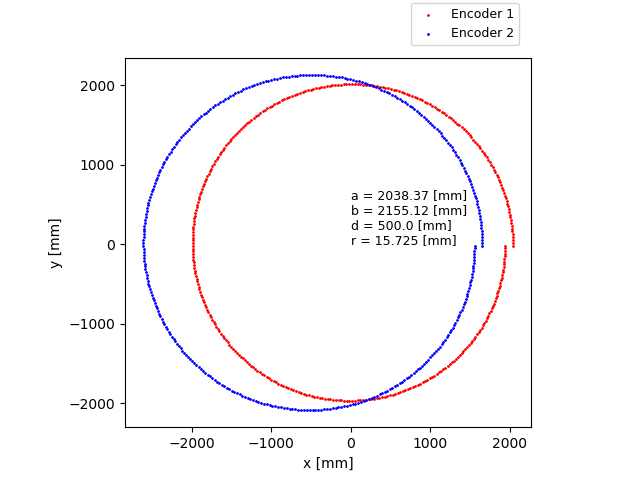

In [7]:
# check
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.scatter(df.x1, df.y1, s=1, c='red', label='Encoder 1')
ax1.scatter(df.x2, df.y2, s=1, c='blue', label='Encoder 2')
ax1.set_xlabel('x [mm]')
ax1.set_ylabel('y [mm]')
comment = "a = %s [mm]\nb = %s [mm]\nd = %s [mm]\nr = %s [mm]" % (a, b, d, r)
ax1.text(0, 0, comment, size=9, c="black")
ax1.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=1, fontsize=9)
plt.show()

In [6]:
df

,theta,x1,y1,x2,y2
0,0.000000,1.500000,-0.015000,1.100000,-0.015000
1,0.017453,1.499772,0.011176,1.099741,0.014667
2,0.034907,1.499086,0.037340,1.098965,0.044320
3,0.052360,1.497945,0.063483,1.097671,0.073951
4,0.069813,1.496348,0.089598,1.095861,0.103549
...,...,...,...,...,...
266,4.642576,-0.114740,-1.425831,-0.728692,-1.625344
267,4.660029,-0.089825,-1.427355,-0.700292,-1.627081
268,4.677482,-0.064891,-1.428443,-0.671871,-1.628321
269,4.694936,-0.039947,-1.429096,-0.643438,-1.629066


In [8]:
def fx_fy(theta_phi):
    (th, ph) = theta_phi
    (x1, y1) = terminal_trajectory(th, r, a, 0)
    (x2, y2) = terminal_trajectory(ph, r, b, d)
    fx = x1 - x2
    fy = y1 - y2
    return np.array([fx, fy])

In [9]:
def jacobian(theta_phi):
    (th, ph) = theta_phi
    a_ = a - r * th
    b_ = b - r * ph
    J11 = -a_ * np.sin(th)
    J12 = b_ * np.sin(ph)
    J21 = a_ * np.cos(th)
    J22 = -b_ * np.cos(ph)
    return np.array([[J11, J12], [J21, J22]])

In [10]:
# newton method
theta_phi = np.array([0.25*np.pi, 0.3*np.pi])
delta = np.array([1e3, 1e3])
i = 0
solutions = []
while (abs(delta[0]) > 1e-4 or abs(delta[1]) > 1e-4):
    try:
        J = jacobian(theta_phi)
        delta = np.dot(np.linalg.inv(J), fx_fy(theta_phi))
        theta_phi = theta_phi - delta
    except:
        theta_phi = np.array([np.nan, np.nan])        

    p1 = terminal_trajectory(theta_phi[0], r, a, 0)
    solutions.append(p1)
    print(i, delta, theta_phi, p1)
    
    i = i + 1
    if (i > 30):
        print('not convergence')
        break

0 [0.48024688 0.78599497] [0.30515128 0.15648282] [1944.34794882  595.96254858]
1 [-1.17756302 -1.20395736] [1.4827143  1.36044018] [ 192.92468404 2005.85922856]
2 [0.11146523 0.21840513] [1.37124907 1.14203505] [ 415.19574316 1973.66934487]
3 [-0.08367122 -0.07872536] [1.45492029 1.22076041] [ 248.64440859 2000.15717645]
4 [0.0006871  0.00138206] [1.45423319 1.21937835] [ 250.0199137  1999.99659216]
5 [-3.36474275e-06 -3.04213900e-06] [1.45423655 1.2193814 ] [ 250.01317807 1999.99738085]


In [103]:
# add solutions to plot
px=np.array(points).transpose()[0]
py=np.array(points).transpose()[1]
ax1.scatter(px, py, s=50, marker='+', c='limegreen', label='solution')
for i in range(len(points)):
    ax1.text(px[i], py[i]-10, str(i), size=9, c='limegreen')

In [104]:
fig.savefig("a=%s[mm]b=%s[mm]d=%s[mm]r=%s[mm].png" % (a, b, d, r))